## Ising Model GAN 

In [1]:
import tensorflow as tf
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, "..")
from input_pipeline import dataset_tfrecord_pipeline
import time
from IPython import display
from model import make_discriminator_model, make_generator_model, train_step

2024-02-16 07:23:18.276773: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Load data

In [2]:
import tensorflow as tf
from input_pipeline import dataset_tfrecord_pipeline
batch_size = 64

train_path = '../../GetData/Python/Data/Data2.5.tfrecord'
train_ds = dataset_tfrecord_pipeline(train_path, flatten=False, batch_size=batch_size)

2024-02-16 07:23:23.507415: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: UNKNOWN ERROR (34)


In [8]:
from datetime import datetime
from pathlib import Path
# Get the current date and time
current_datetime = datetime.now()

# Format it to include date, hour, and minutes
formatted_datetime = current_datetime.strftime("%Y-%m-%d_%H-%M")

results = Path("results/" + formatted_datetime)
results.mkdir()

In [2]:
def generate_and_save_images(model, epoch, test_input):
  predictions = tf.round(model(test_input, training=False))

  fig = plt.figure(figsize=(4,4))
  
  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0])
      plt.axis('off')
        
  plt.savefig(results / 'image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

def train(dataset, epochs, gen_loss_log, disc_loss_log):  
  folder = 
  for epoch in range(epochs):
    start = time.time()

    for images in tqdm(dataset): train_step(images, gen_loss_log, disc_loss_log, batch_size, noise_dim, generator, discriminator, generator_optimizer, discriminator_optimizer)

    display.clear_output(wait=True) 
    generate_and_save_images(
      generator,
      epoch + 1,
      random_vector_for_generation
    ) 
    print (f"Time taken for epoch {epoch} is {time.time()- start} sec")
    

noise_dim = 100
num_examples_to_generate = 16
random_vector_for_generation = tf.random.normal([num_examples_to_generate,
                                                 noise_dim])
generator = make_generator_model()
discriminator = make_discriminator_model()
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

2024-02-16 07:20:07.588794: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: UNKNOWN ERROR (34)


# Train

In [4]:
EPOCHS=20
gen_loss_log=[]
disc_loss_log=[]

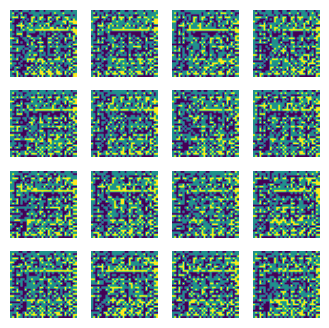

Time taken for epoch 4 is 459.8544158935547 sec


554it [05:36,  1.65it/s]


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/ps/.local/lib/python3.11/site-packages/IPython/core/magics/execution.py", line 1332, in time
    out = eval(code, glob, local_ns)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<timed eval>", line 1, in <module>
  File "/tmp/ipykernel_9338/3134912901.py", line 19, in train
    for images in tqdm(dataset): train_step(images, gen_loss_log, disc_loss_log, batch_size, noise_dim, generator, discriminator, generator_optimizer, discriminator_optimizer)
                                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ps/Code/FUW/Ising/Model/GAN/model.py", line 76, in train_step
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
                             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/ps/.local/lib/python3.11/site-packages/tensorflow/python/eage

In [5]:
%%time
train(train_ds, EPOCHS,gen_loss_log, disc_loss_log)

## Plot the loss of the generator and discriminator

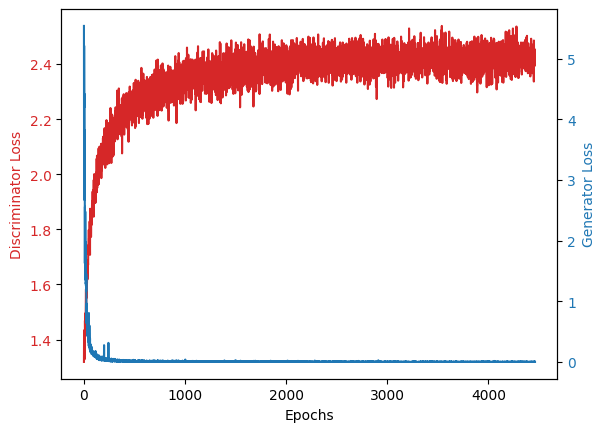

In [6]:
fig, ax1 = plt.subplots()

ax1.plot(np.asarray(disc_loss_log), color='tab:red')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Discriminator Loss', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.plot(np.asarray(gen_loss_log), color='tab:blue')
ax2.set_ylabel('Generator Loss', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.show()

In [4]:
generator.load_weights('generator_model.keras')

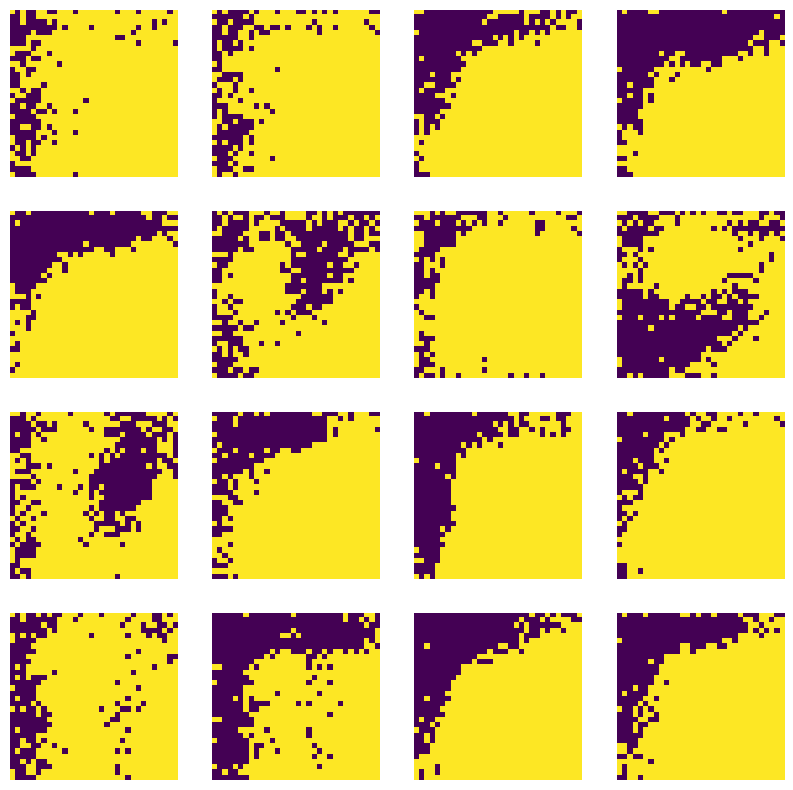

In [6]:
plt.figure(figsize=(10, 10))
predictions = generator(random_vector_for_generation, training=False)
for i in range(16):
    plt.subplot(4, 4, i+1)
    spins = np.random.binomial(1, predictions[i, :, :])
    plt.imshow(spins)
    plt.axis('off')
plt.show()

In [14]:
print(predictions.shape)

(16, 32, 32, 1)
